In [344]:
# 테스트 코드
from konlpy.tag import Kkma 
from konlpy.utils import pprint 

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [345]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.pos(text)

for res in result:
    print(res)

('분명', 'Noun')
('배달', 'Noun')
('이', 'Josa')
('완료', 'Noun')
('되었는데', 'Verb')
('나', 'Noun')
('는', 'Josa')
('받지', 'Verb')
('않았어', 'Verb')


In [346]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.morphs(text)

for res in result:
    print(res)

분명
배달
이
완료
되었는데
나
는
받지
않았어


In [347]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.nouns(text) 

for res in result:
    print(res)

분명
배달
완료
나


In [348]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result1 = okt.pos(text)     # pos() => 품사 태깅
result2 = okt.morphs(text)
result3 = okt.nouns(text)

print(result1)
print(result2)
print(result3)

[('분명', 'Noun'), ('배달', 'Noun'), ('이', 'Josa'), ('완료', 'Noun'), ('되었는데', 'Verb'), ('나', 'Noun'), ('는', 'Josa'), ('받지', 'Verb'), ('않았어', 'Verb')]
['분명', '배달', '이', '완료', '되었는데', '나', '는', '받지', '않았어']
['분명', '배달', '완료', '나']


In [349]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ"
text2 = "나는 밥을 먹었다"

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm=True) # norm => 표준어로 바꿔주는 옵션
result3 = okt.pos(text2, stem=True) # stem => 현재형으로 바꿔주는 옵션

print(result1)
print(result2)
print(result3)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb')]


# 1) 데이터 불러오기

In [350]:
# 데이터 불러오기
# 미션1: 첫번째 데이터 댓글을 형태소 분석기로 쪼개보기
# 미션2: 처음부터 5개의 데이터 댓글을 추출해서 반복문으로 형태소 분석기로 쪼개보기

In [351]:
# 데이터 불러오기
import pandas as pd
baemin_reveiws = pd.read_csv("배달의민족댓글.csv")
baemin_reveiws.head(10)

,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,댓글
0,0,0,0,0,0,0,0,0,0,0,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,1,1,1,1,1,1,1,1,1,1,4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,2,2,2,2,2,2,2,2,2,2,5,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,3,3,3,3,3,3,3,3,3,3,6,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,4,4,4,4,4,4,4,4,4,4,7,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
5,5,5,5,5,5,5,5,5,5,5,8,B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
6,6,6,6,6,6,6,6,6,6,6,9,수저포크x 버튼 기본으로 활성화 되어있는거 환경 보호한다고 해놓은거 압니다. 그런데...
7,7,7,7,7,7,7,7,7,7,7,10,개선이되고 업데이트가 된다는건 불편했던 사항들을 반영하는것 아닌가요? 오히려 더 불...
8,8,8,8,8,8,8,8,8,8,8,11,사용자만 볼 수있는 배달시켰던 가게들에 대한 메모기능?이랑 언제 몇번 먹었다 같은걸...
9,9,9,9,9,9,9,9,9,9,9,12,저는 알뜰이나 한집배달이용을 원치않는데 가게검색시에는 가게배달은 선택할수가없네요. ...


In [352]:
# 결측치 확인하기
baemin_reveiws.isna().sum()

Unnamed: 0.10    0
Unnamed: 0.9     0
Unnamed: 0.8     0
Unnamed: 0.7     0
Unnamed: 0.6     0
Unnamed: 0.5     0
Unnamed: 0.4     0
Unnamed: 0.3     0
Unnamed: 0.2     0
Unnamed: 0.1     0
Unnamed: 0       0
댓글               0
dtype: int64

In [353]:
# 결측치 제거하기
baemin_reveiws_alpha = baemin_reveiws.dropna().reset_index(drop=True)
baemin_reveiws_alpha.head(15)

,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,댓글
0,0,0,0,0,0,0,0,0,0,0,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,1,1,1,1,1,1,1,1,1,1,4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,2,2,2,2,2,2,2,2,2,2,5,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,3,3,3,3,3,3,3,3,3,3,6,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,4,4,4,4,4,4,4,4,4,4,7,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
5,5,5,5,5,5,5,5,5,5,5,8,B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
6,6,6,6,6,6,6,6,6,6,6,9,수저포크x 버튼 기본으로 활성화 되어있는거 환경 보호한다고 해놓은거 압니다. 그런데...
7,7,7,7,7,7,7,7,7,7,7,10,개선이되고 업데이트가 된다는건 불편했던 사항들을 반영하는것 아닌가요? 오히려 더 불...
8,8,8,8,8,8,8,8,8,8,8,11,사용자만 볼 수있는 배달시켰던 가게들에 대한 메모기능?이랑 언제 몇번 먹었다 같은걸...
9,9,9,9,9,9,9,9,9,9,9,12,저는 알뜰이나 한집배달이용을 원치않는데 가게검색시에는 가게배달은 선택할수가없네요. ...


In [354]:
# 데이터 저장하기
baemin_reveiws_alpha.to_csv("배달의민족댓글.csv")

In [355]:
baemin_reveiws = pd.read_csv("배달의민족댓글.csv")
baemin_reveiws

,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,댓글
0,0,0,0,0,0,0,0,0,0,0,0,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,1,1,1,1,1,1,1,1,1,1,1,4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,2,2,2,2,2,2,2,2,2,2,2,5,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,3,3,3,3,3,3,3,3,3,3,3,6,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,4,4,4,4,4,4,4,4,4,4,4,7,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,455,455,455,455,455,455,455,455,455,455,455,458,우선 배달업체 광고가 너무 많습니다. 두번째는 주문직전 주소바꾸기 안되는게 매우매우...
456,456,456,456,456,456,456,456,456,456,456,456,459,배민 쭉 써왔고 쓴소리 하나 하려합니다. 중간다리 플랫폼으로서 식당/유저 사이 중재...
457,457,457,457,457,457,457,457,457,457,457,457,460,업데이트된거 디자인 너무 불편해요. 배민1 부분에서 음식점 둘러보는데 빨리 한거번에...
458,458,458,458,458,458,458,458,458,458,458,458,461,첫주문도 아닌데 첫주문 할인받으로 광고 계속오고 친구초대 하려하니까 주문내역이 없다...


In [356]:
# 첫번째 댓글 가져오기
review1 = baemin_reveiws["댓글"][0]
review1

'80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.'

In [357]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

text = review1
result = okt.pos(text)

for res in result:
    print(res)

('80분', 'Number')
('걸린다길래', 'Verb')
('주문', 'Noun')
('취소', 'Noun')
('하려고', 'Verb')
('주', 'Modifier')
('문', 'Modifier')
('내', 'Modifier')
('역', 'Noun')
('에', 'Josa')
('들어가면', 'Verb')
('계속', 'Noun')
('최신', 'Noun')
('정보', 'Noun')
('를', 'Josa')
('불러오지', 'Verb')
('못', 'VerbPrefix')
('했다고만', 'Verb')
('로딩', 'Noun')
('반복', 'Noun')
('.', 'Punctuation')
('로딩', 'Noun')
('이미지', 'Noun')
('는', 'Josa')
('깨져서', 'Verb')
('나오고', 'Verb')
('안정', 'Noun')
('적', 'Suffix')
('인', 'Josa')
('네트워크', 'Noun')
('상황', 'Noun')
('하', 'Noun')
('에서', 'Josa')
('새로고침', 'Noun')
('을', 'Josa')
('눌러도', 'Verb')
('무한', 'Noun')
('로딩', 'Noun')
('이고', 'Josa')
('심지어', 'Noun')
('지금', 'Noun')
('진행중', 'Noun')
('인', 'Josa')
('주', 'Modifier')
('문', 'Modifier')
('내', 'Modifier')
('역', 'Noun')
('정보', 'Noun')
('조차', 'Josa')
('정확하지', 'Adjective')
('않음', 'Verb')
('.', 'Punctuation')
('코로나', 'Noun')
('때문', 'Noun')
('에', 'Josa')
('서버', 'Noun')
('가', 'Josa')
('불안정한', 'Adjective')
('건지', 'Verb')
('뭔', 'Noun')
('지는', 'Josa')
('모르겠으나', 'Verb')
('결국'

In [358]:
# 처음부터 다섯개의 댓글 가져오기
review5 = baemin_reveiws["댓글"][:5]
review5

0    80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1    음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2    왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3    배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...
4    장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
Name: 댓글, dtype: object

In [359]:
from konlpy.tag import Okt # Okt, Kkma

okt = Okt()

for i, review_a in enumerate(review5.tolist()):
    # print(review_a)
    result = okt.pos(review_a)
    print(f"{i}번째 형태소 분석기 결과:\n\t{result}")

0번째 형태소 분석기 결과:
	[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'Noun'), ('조차', 'Josa'), ('정확하지', 'Adjective'), ('않음', 'Verb'), ('.', 'Punctuation'), ('코로나', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('서버', 'Noun'), ('가', 'Josa'), ('불안정한', 'Adje

In [360]:
from konlpy.tag import Okt # Okt, Kkma

for i,review_b in enumerate(review5.tolist()):
    result = okt.pos(review_b)
    # print(result)
    temp_list = []
    for word, pos in result:
        if pos == "Noun":
            temp_list.append(word)
            # print(word, pos)
    print(f"{i}번째 Noun 형태소 분석기 결과:\n\t{temp_list}")
    
    # print(f"{i}번째 형태소 분석기 결과:\n\t{result}")

0번째 Noun 형태소 분석기 결과:
	['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
1번째 Noun 형태소 분석기 결과:
	['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
2번째 Noun 형태소 분석기 결과:
	['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
3번째 Noun 형태소 분석기 결과:
	['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한

In [361]:
# 정규표현식을 쓰는 이유
# ㄴ 복잡한 문자열 패턴도 한 줄로 "정확하게" 찾고, 추출하고, 바꾸고, 검사할 수 있어서이다.

In [362]:
sen_1 = "오늘!!!!!!!!!!!!!!!!!!!! ㅇㅇ너무   hello HELLO 010-7894-5798    기분 좋아^^ ㅎㅇㅎㅇ"

import re
new_sen_1 = re.sub("[^가-힣|-|\s]", "", sen_1) # 대괄호에 있는 애들 빼고 없애주세요~! 의 의미입니다!
# new_sen_1 = re.sub("[^0-9a-zA-Z가-힣\s+-]", "", sen_1)
print(new_sen_1)

# 워드클라우드 생성 시의 전처리 과정!

오늘 너무         기분 좋아 


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_21912\909803627.py:4: SyntaxWarning: invalid escape sequence '\s'
  new_sen_1 = re.sub("[^가-힣|-|\s]", "", sen_1) # 대괄호에 있는 애들 빼고 없애주세요~! 의 의미입니다!


In [363]:
# 워드 클라우드
# 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1 : 전처리 과정(특수문자, 자음, 모음, 없애기)
# 조건2 : 불용어 제거(stopwords) -> 우리가 사용할 때 의미가 없는 것들
# 조건3 : 한 글자인 단어는 포함하지 않는다.

In [364]:
word_list = []
stopwords = ["배민", "민족"]

for i,review_c in enumerate(baemin_reveiws_alpha["댓글"].tolist()):
    # 조건1 : 전처리 과정(특수문자, 자음, 모음, 없애기)
    new_review_c = re.sub("[^0-9a-zA-Z가-힣\s]", "", review_c)
    # 형태소 분석기
    result = okt.nouns(new_review_c)
    for word in result:
        #조건2 조건3 넣고 word list 추가하기
        # 조건2 : 불용어 제거(stopwords) -> 우리가 사용할 때 의미가 없는 것들
        # 조건3 : 한 글자인 단어는 포함하지 않는다.
        if len(word) == 1 or word in stopwords:
            continue
        #word_list에 추가
        word_list.append(word)

    print(f"{i}번째 리뷰 : {review_c}")

0번째 리뷰 : 80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
1번째 리뷰 : 음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) 카드 결제선택시 또 다른 은행앱을 깔고 인증을 한 3번정도 더 해야함... 해외카드로 결제수단은 아예없고 왜 현금결제 옵션도 없나요... 음식하나 시켜먹는데 이렇게 복잡한 나라 우리나라 밖에없습니다 IT강국은 무슨... 왜 핸드폰 번호 인증, 카드인증등 불편하게 스탭이 많나요 앱 사용중에도 UI/UX, front-end 쪽으로도 다 너무 짜증나고 결국 저녁도 못시켜먹음 하... 외국거주자는 방법이 없네요 왜 해외카드는 결제가 안되나요....
2번째 리뷰 : 왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 더 번거롭게 바뀌네요. 일반결제가 기본임에도 저쪽 구석으로 밀려나고 마치 한집배달을 유도하듯 메인에 만들어 놔서 잘못 클릭하면 자꾸 나가서 일반결제를 다시 클릭해야하게 만들어놓더니. 이젠 결제창에 요청사항이나 리뷰이벤트할때 또 클릭해서 하게끔 바뀌었네요. 쓸데없는 짓 정말 잘하네요 배민.
3번째 리뷰 : 배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는것 같습니다.. 식당입장, 그러니까 업주 입장에서는 높은 별점으로 인한 주문건수를 기대하려 하겠지만, 주문자 입장에서는 맛이 없는 식당들도 대체적으로 4.8점이 넘어 정확한 맛집 탐색이 어렵다는 점에서 앱자체에 대한 평점은 3점으로 남겨 놓습니다.. 즐거운 식사를 항상 추구하고 기대하나 평점에 속아 그러지 못해 이를 애석하게 생각하고 있습니다! 수고하시는 어플리케이션 개발자 여러분들 좋은 아이

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_21912\429742673.py:6: SyntaxWarning: invalid escape sequence '\s'
  new_review_c = re.sub("[^0-9a-zA-Z가-힣\s]", "", review_c)



24번째 리뷰 : 쿠폰을 상시로 뿌리고 가끔 이벤트로 뿌리는 쿠폰까지 더하면 포장방문 보다 약 10~20% 더 싸게 배달 시킬 수 있어서 편리하고 너무 좋은 것 같아요 ㅎㅎ 딱 한가지 아쉬운 점이 거의 모든 가게들이 최소주문금액이 12000~15000원 가까이 되서 혼자서 주문하기는 너무 부담됩니다ㅠ 1인분 기능이 있긴하지만 원하는 음식점은 항상 1인분 기능에 포함 안되어 있어서 항상 포장방문만 이용하는 것 같아요.
25번째 리뷰 : 다른 거 다 필요없고 메뉴를 장바구느에 담는 기능 중에 장바구니 저장 기능도 만들어주시면 안될까요?? 빵집에서 먹고싶은 빵들 종류가 다양해서 하나하나 보면서 장바구니에 담았는데 다른 빵집꺼 한 번 담았더니 어떤 빵을 담았었는지 몰라서 다시 찾아야하는 번거로운때문에요..ㅠㅠ 장바구니 메뉴 저장기능이 있으면 전에 먹었던 메뉴들 그대로 불러올 수 있었으면 좋겠습니다
26번째 리뷰 : 업데이트를 하면 할수록 불편함.. 사람들은 쓰던 위치에 쓰던 방식으로만 빨리 주문하고 끄는데 인터페이스 자꾸 바꾸면서 기능 추가오지게 한거 클릭이라도 하게 만들라고 위치 막 바꾸니까. 개 빡침. 요기요로 옴기는사람이 많음.
27번째 리뷰 : 응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 안하면 적어도 취소라도 하게 해야죠. 전화도 안되고 채팅도 안되면 이런 문제상황이 발생했을때 어떻게 대처하려고 그러시나 배민 수준 점점 떨어지는게 보이네요. 앞으로는 이용 안할 생각입니다
28번째 리뷰 : 긴말 필요없이 별점 2.7점인 이유가 있음 편리한 것도 있지만 불편하고 짜증나는게 편리한거에 몇배는 됨. 진짜 불편하고 쓸때마다 스트레스 받음. 별점이 이따위면 보통은 개선할 생각을 할텐데 왜 계속 그대로이거나 점점 더 불편하게 만들죠? 뭐 어플 덕분에 돈 아껴서 참 좋네요.ㅋㅋ 근데 진짜로 별점 1점주기도 아까워요. 아 그리고 이유가 뭔지 말안하긴 했는데 별점낮은 것들보면 여러가지 나오시니까 잘 아시겟죠?
29번째 리뷰 : 장바구니에

In [365]:
from collections import Counter 

example = ["남", "여", "여", "남", "남", "남"]
counter = Counter(example)
print(counter)

Counter({'남': 4, '여': 2})


In [366]:
counter = Counter(word_list)
print(counter)

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

In [367]:
counter = Counter(word_list)
print(counter)
print(counter.most_common(30)) # 가장 많이 발생한 것 30개

Counter({'배달': 601, '주문': 237, '가게': 215, '메뉴': 142, '시간': 124, '기능': 109, '고객': 107, '리뷰': 105, '사용': 101, '취소': 99, '음식': 99, '결제': 95, '어플': 92, '전화': 79, '검색': 77, '센터': 77, '다른': 71, '업데이트': 68, '이용': 67, '연결': 66, '쿠폰': 66, '계속': 61, '문제': 57, '다시': 55, '그냥': 55, '선택': 50, '진짜': 50, '생각': 49, '상담': 49, '하나': 47, '화면': 46, '확인': 46, '추가': 45, '요청': 43, '개선': 43, '매장': 42, '설정': 41, '기본': 39, '경우': 39, '식당': 38, '사항': 37, '사람': 37, '배차': 36, '삭제': 34, '라이더': 34, '서비스': 34, '포장': 33, '채팅': 33, '사진': 33, '기사': 32, '정말': 31, '지연': 31, '연락': 31, '알뜰': 30, '시스템': 30, '직접': 29, '할인': 29, '지도': 29, '버튼': 28, '문의': 28, '처음': 28, '음식점': 28, '사용자': 27, '정도': 26, '한번': 26, '자체': 26, '해도': 26, '이상': 26, '별로': 26, '위치': 25, '목록': 25, '무슨': 24, '부분': 24, '이유': 24, '바로': 24, '로그인': 24, '입력': 24, '때문': 23, '항상': 23, '자주': 23, '답변': 23, '이제': 23, '광고': 23, '혜택': 23, '이번': 23, '보고': 23, '가지': 22, '주소': 22, '전체': 21, '이해': 21, '표시': 21, '사장': 21, '운영': 21, '오류': 21, '정보': 20, '카드': 20, '장바구니': 20, '체

# 3) 워드 클라우드

In [368]:
# 내 시스템 폰트에서 "gothic"인 폰트와 그 경로 찾기
from matplotlib import font_manager 

search_font = "gothic"

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_font in font_name.lower():
        print(font_name, font_path )

Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Copperplate Gothic Bold C:\Windows\Fonts\COPRGTB.TTF
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
MS Gothic C:\Windows\Fonts\msgothic.ttc
NanumGothic C:\Windows\Fonts\.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Yu Gothic C:\Windows\Fon

`uv add wordcloud`

<>:6: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_21912\1556908888.py:6: SyntaxWarning: invalid escape sequence '\W'
  font_path="C:\Windows\Fonts\H2MJRE.TTF",


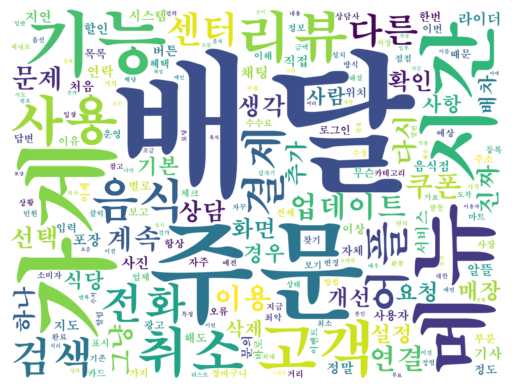

In [369]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

wc = WordCloud(
    font_path="C:\Windows\Fonts\H2MJRE.TTF",
    background_color="white",
    width=1200,
    height=900
)

wc.generate_from_frequencies(counter)

# plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_21912\2690066132.py:11: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\H2MJRE.ttf",


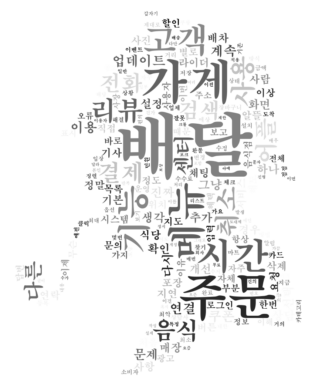

In [370]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import koreanize_matplotlib

from PIL import Image
import numpy as np 

mask_img = np.array(Image.open("sherlock.png"))

wc = WordCloud(
    font_path = "C:\Windows\Fonts\H2MJRE.ttf",
    mask=mask_img,
    background_color="white",
    colormap="gist_gray",
    width=1200,
    height=900
)

wc.generate_from_frequencies(counter)

# plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\W'
<>:16: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_21912\1038701216.py:16: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\H2MJRE.ttf",


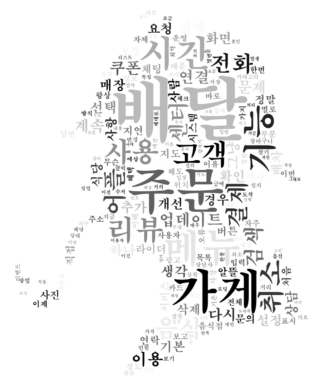

In [371]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem
# 조건은 동알
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import koreanize_matplotlib

from PIL import Image
import numpy as np 

mask_img = np.array(Image.open("sherlock.png"))

wc = WordCloud(
    font_path = "C:\Windows\Fonts\H2MJRE.ttf",
    mask=mask_img,
    background_color="white",
    colormap="gist_gray",
    width=1200,
    height=900
)

wc.generate_from_frequencies(counter)

# plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [372]:
# 배달의민족 댓글 "동사"에 대한 워드 클라우드
# norm, stem
# 조건은 동알
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_21912\3359255889.py:10: SyntaxWarning: invalid escape sequence '\s'
  new_review_c = re.sub("[^가-힣\s]", "", review_c)
C:\Users\user\AppData\Local\Temp\ipykernel_21912\3359255889.py:41: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\H2MJRE.ttf",


0번째 리뷰 : 80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
1번째 리뷰 : 음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) 카드 결제선택시 또 다른 은행앱을 깔고 인증을 한 3번정도 더 해야함... 해외카드로 결제수단은 아예없고 왜 현금결제 옵션도 없나요... 음식하나 시켜먹는데 이렇게 복잡한 나라 우리나라 밖에없습니다 IT강국은 무슨... 왜 핸드폰 번호 인증, 카드인증등 불편하게 스탭이 많나요 앱 사용중에도 UI/UX, front-end 쪽으로도 다 너무 짜증나고 결국 저녁도 못시켜먹음 하... 외국거주자는 방법이 없네요 왜 해외카드는 결제가 안되나요....
2번째 리뷰 : 왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 더 번거롭게 바뀌네요. 일반결제가 기본임에도 저쪽 구석으로 밀려나고 마치 한집배달을 유도하듯 메인에 만들어 놔서 잘못 클릭하면 자꾸 나가서 일반결제를 다시 클릭해야하게 만들어놓더니. 이젠 결제창에 요청사항이나 리뷰이벤트할때 또 클릭해서 하게끔 바뀌었네요. 쓸데없는 짓 정말 잘하네요 배민.
3번째 리뷰 : 배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는것 같습니다.. 식당입장, 그러니까 업주 입장에서는 높은 별점으로 인한 주문건수를 기대하려 하겠지만, 주문자 입장에서는 맛이 없는 식당들도 대체적으로 4.8점이 넘어 정확한 맛집 탐색이 어렵다는 점에서 앱자체에 대한 평점은 3점으로 남겨 놓습니다.. 즐거운 식사를 항상 추구하고 기대하나 평점에 속아 그러지 못해 이를 애석하게 생각하고 있습니다! 수고하시는 어플리케이션 개발자 여러분들 좋은 아이

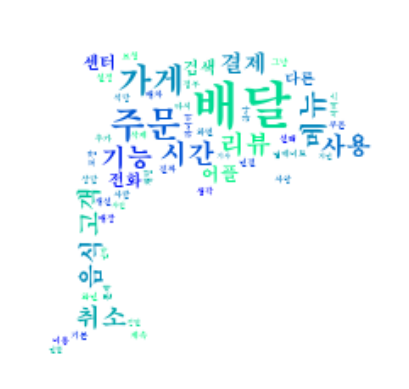

In [377]:
import re
from konlpy.tag import Okt

word_list_mission = []
stopwords = ["배민", "민족"]
okt = Okt()

for i, review_c in enumerate(baemin_reveiws_alpha["댓글"].tolist()):
    # 조건1: 특수문자 제거
    new_review_c = re.sub("[^가-힣\s]", "", review_c)

    # 형태소 분석
    result = okt.pos(new_review_c, norm=True, stem=True)

    for word, tag in result:
        # 조건2: 불용어 제거
        if word in stopwords:
            continue
        # 조건3: 한 글자 제거
        if len(word) == 1:
            continue
        # 조건4: 동사(V로 시작하는 태그)만 포함
        if not tag.startswith('V'):
            continue

        word_list_mission.append(word)

    print(f"{i}번째 리뷰 : {review_c}")


from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import koreanize_matplotlib

from PIL import Image
import numpy as np 

mask_img = np.array(Image.open("dolphin.png"))

wc = WordCloud(
    font_path = "C:\Windows\Fonts\H2MJRE.ttf",
    mask=mask_img,
    background_color="white",
    colormap="winter",
    width=1200,
    height=900
)

wc.generate_from_frequencies(counter)

# plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# 5) 검색

In [ ]:
# 명사들을 추출한 위드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?